# Plot Correlation

* [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* [pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

In [1]:
import pandas as pd
import seaborn as sns

# Constant

In [2]:
DATA_DIR: str = "../data/titanic"

# Dataframe

In [3]:
df = pd.read_csv(
    f"{DATA_DIR}/train.csv"
)
df.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


# Unique Values

In [5]:
sorted(df["Pclass"][df["Pclass"].notna()].unique())

[1, 2, 3]

In [6]:
sorted(df["Embarked"][df["Embarked"].notna()].unique())

['C', 'Q', 'S']

In [7]:
sorted(df["SibSp"][df["SibSp"].notna()].unique())

[0, 1, 2, 3, 4, 5, 8]

In [8]:
df.replace({
    'Sex': {"male": 0, "female": 1},
    "Embarked": {'C': 0, 'Q': 1, 'S': 2}
}, inplace=True)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

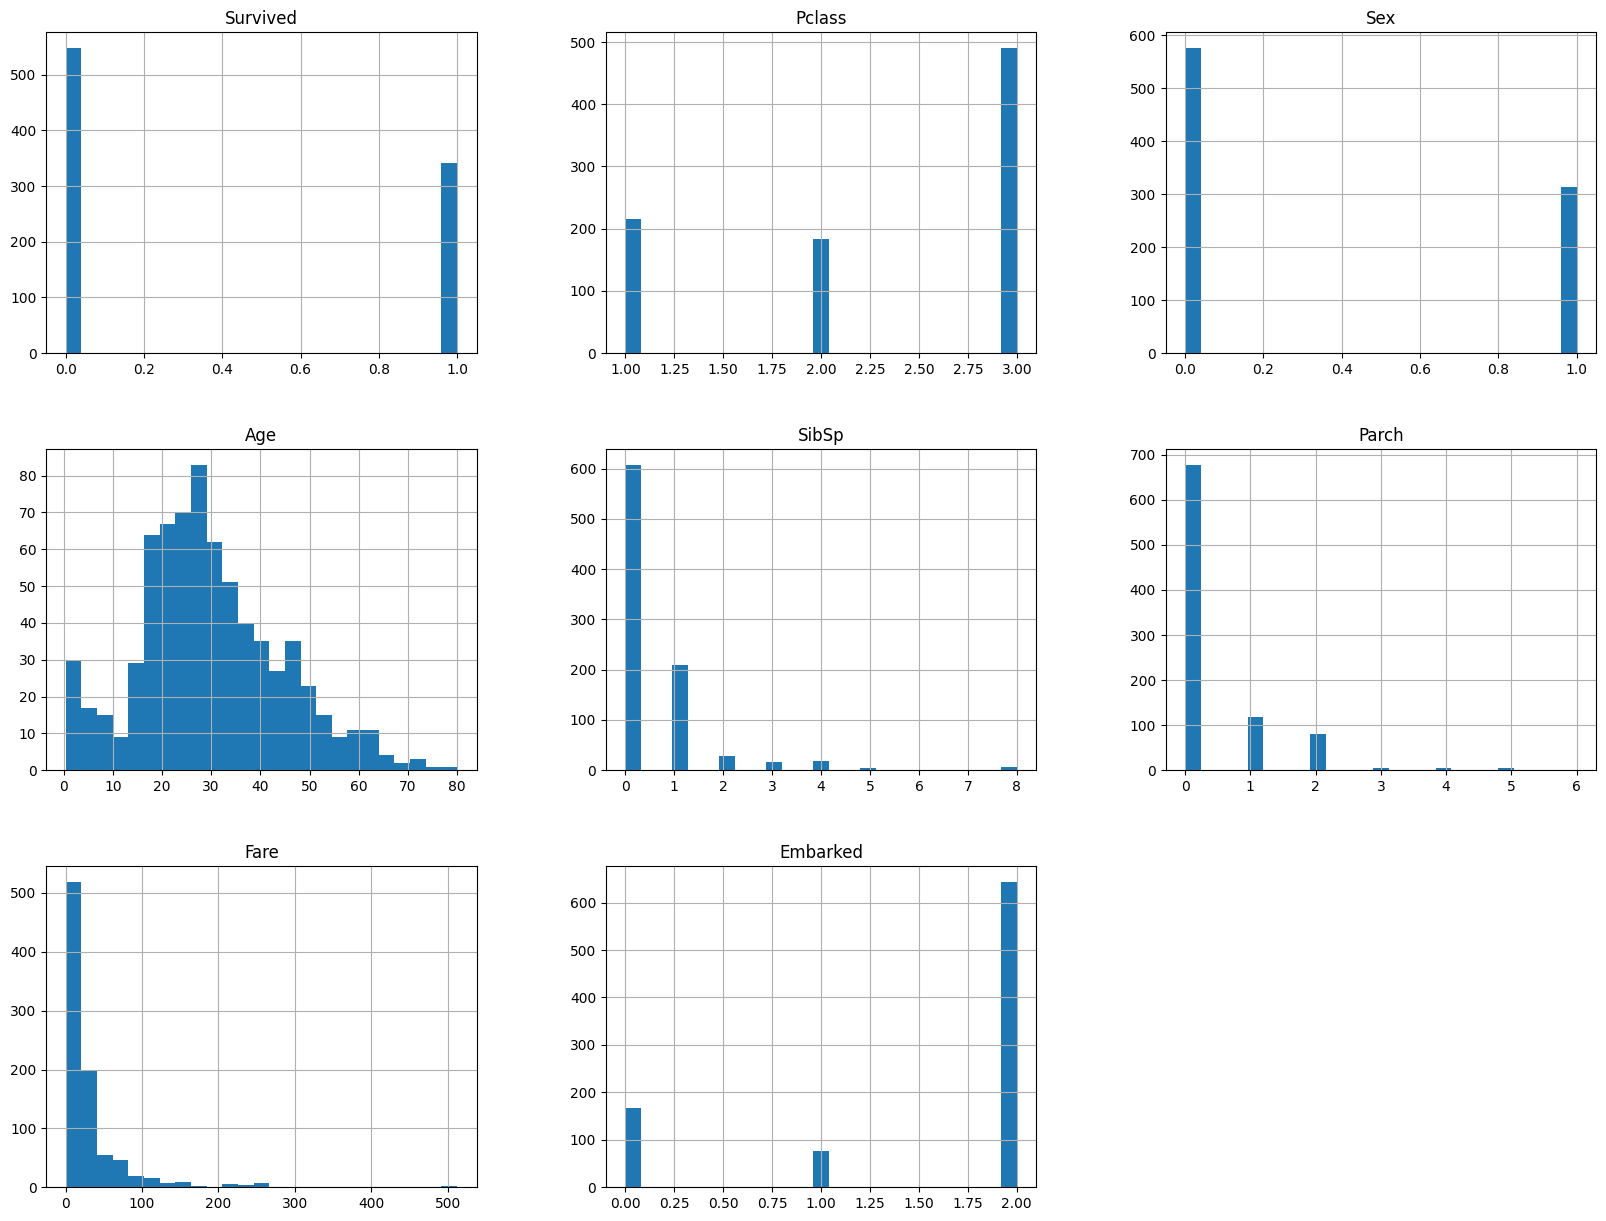

In [9]:
df.hist(bins=25, figsize=(20, 15))

# Correlation Matrix

In [10]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.169718
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.164681
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.110320
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.032565
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.068900
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.040449
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.226311
Embarked,-0.169718,0.164681,-0.110320,-0.032565,0.068900,0.040449,-0.226311,1.000000


# Correlation Heatmap

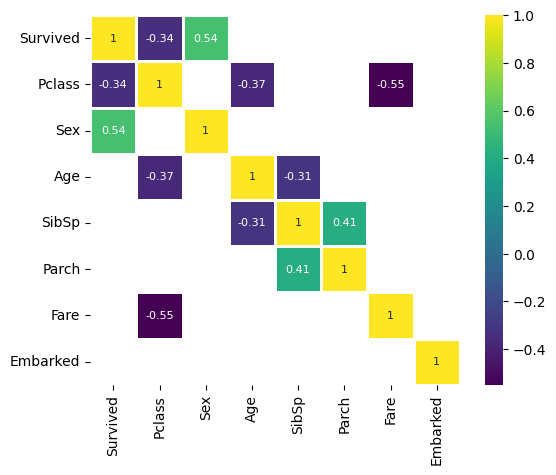

In [19]:
sns.heatmap(
    correlation[(correlation >= 0.3) | (correlation <= -0.3)], 
    cmap='viridis', 
#    vmax=1.0, 
#    vmin=-1.0, 
    linewidths=1,
    annot=True, 
    annot_kws={"size": 8}, 
    square=True
);

# Pclass vs Fare

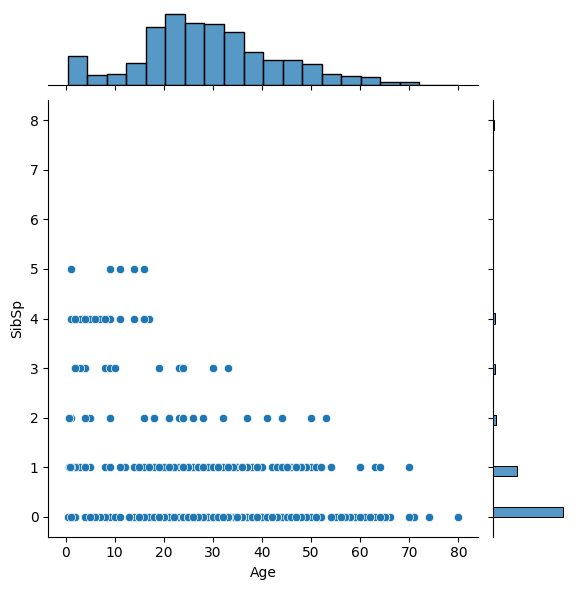

In [25]:
sns.jointplot(x="Age", y="SibSp", data=df);